<a href="https://colab.research.google.com/github/KeHang-Zhu/Harvard_Applied_Math_201/blob/main/AM_201_HW2_sol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AM 201: Homework 2



### *Author:* **Davide Bray**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
init_printing()
from scipy.optimize import brentq
from scipy.integrate import odeint
from scipy.integrate import solve_ivp
from scipy import integrate

## Problem 1

$$\frac{d^3y}{dx^3} = \left(\frac{1}{1+x^2}\right)\left(\frac{d^2 y}{dx^2}\right)-\left(\frac{dy}{dx}\right)^2-\frac{1}{26+x+sin(x)}$$

### Answer to Question 1

Let's numerically solve the higher order ODE.

False
4.0


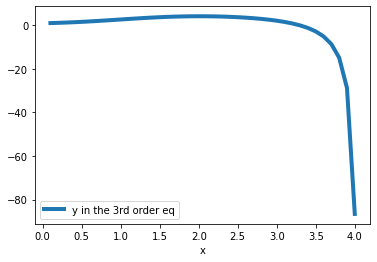

In [ ]:
def fun(x,y):
    return [y[1], y[2], (1/(1+x**2))*y[2]-(y[1])**2-(1/(26+x+np.sin(x)))]


y0=[1,1,2]
x=np.linspace(0.1,10,100)
sol=solve_ivp(fun,(0.1,10.), y0,t_eval=x)

plt.plot(sol.t,sol.y[0,:],linewidth=4,label='y in the 3rd order eq')
plt.xlabel('x')
plt.legend(loc='best');
print(sol.success)
print(sol.t[-1])

It seems to diverge for $x \approx 4$.

### Answer to Question 2 and Question 3

Let's pay attention to large x, first.

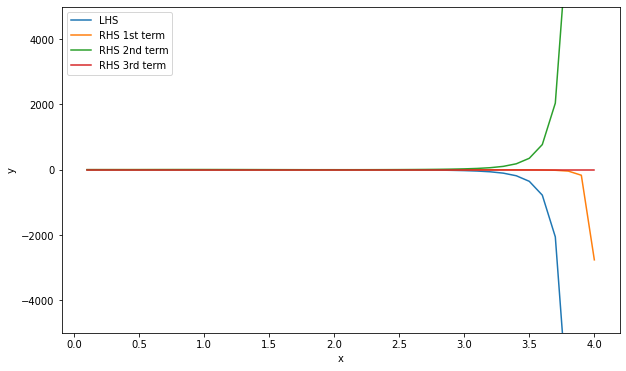

In [ ]:
plt.figure(figsize=(10,6))
x=sol.t
y=sol.y
plt.plot(x,(1/(1+x**2))*y[2,:]-(y[1,:])**2-(1/(26+x+np.sin(x))),label='LHS')
plt.plot(x,(1/(1+x**2))*y[2,:],label='RHS 1st term')
plt.plot(x,(y[1,:])**2,label='RHS 2nd term')
plt.plot(x,(1/(26+x+np.sin(x))),label='RHS 3rd term')
plt.ylim(-5000,5000)
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best');

So we see the balance is between $y'''$ and $(y')^2$, for large $x$. We can also see this by plotting $y''$ and see it blows up.

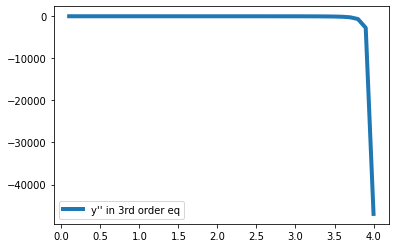

In [ ]:
plt.plot(x,y[2,:],linewidth=4,label='y\'\' in 3rd order eq')
plt.legend(loc='best');

Therefore, the dominant balance gives:
$$ y'''+(y')^2 = 0 $$

Let's now observe small $x$.

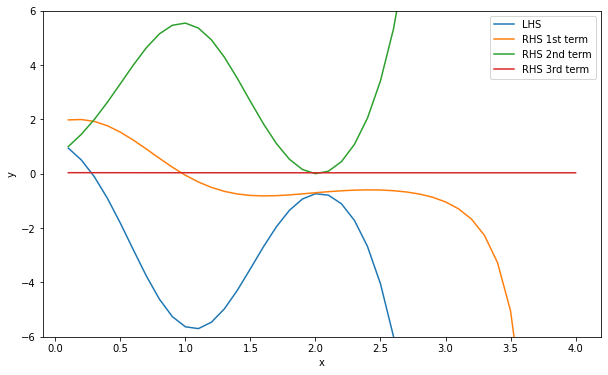

In [ ]:
plt.figure(figsize=(10,6))
x=sol.t
y=sol.y
plt.plot(x,(1/(1+x**2))*y[2,:]-(y[1,:])**2-(1/(26+x+np.sin(x))),label='LHS')
plt.plot(x,(1/(1+x**2))*y[2,:],label='RHS 1st term')
plt.plot(x,(y[1,:])**2,label='RHS 2nd term')
plt.plot(x,(1/(26+x+np.sin(x))),label='RHS 3rd term')
plt.ylim(-6,6)
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best');

In this case, the dominant terms are:
$\left(\frac{dy}{dx}\right)^2$ and $\left(\frac{1}{1+x^2}\right)\left(\frac{d^2 y}{dx^2}\right)$.

### Answer to Question 4

Let's approximate divergence as: 
$$y(x)=A(x^*-x)^p+C$$

Let's now plug this form into the dominant balance that is written above:
$$ A\times \left(p \right)\left(p-1 \right)\left(p-2 \right) \left[x^*-x \right]^{p-3} = -A^2\times \left(p^2 \right)\left[x^*-x \right]^{2p-2} $$

Let the exponentials be equal. $$p-3=2p-2\Longrightarrow p=-1$$ And $$A=-6$$

By using the initial condition we can determine $C$:
$$ C \approx 2.62$$

First of all, let's plot the approximation close to the blow-up point:

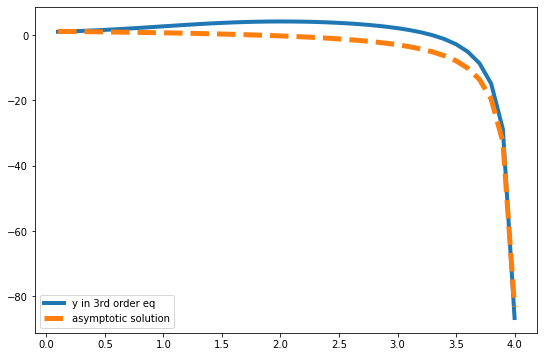

In [ ]:
plt.figure(figsize=(9,6))

plt.plot(x,y[0,:],linewidth=4,label='y in 3rd order eq')
plt.plot(x,-6*(4.07-x)**(-1)+2.62,'--',linewidth=5,label='asymptotic solution')

plt.legend(loc='best');

Let's now try to approximate solutions for small $x$.

When $x$ is small,:
$$ \frac{1}{1+x^2} \approx 1,$$

which implies:
$$ \frac{1}{1+x^2}\left(\frac{d^2 y}{dx^2}\right) \approx \left(\frac{d^2 y}{dx^2}\right)$$ 

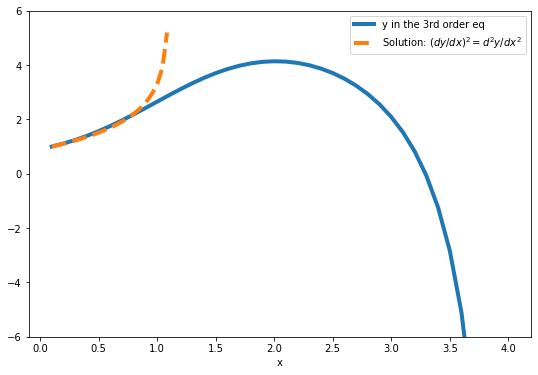

In [ ]:
def fun_small_x(x,y):
    return [y[1], (y[1])**2]

y0_approx=[1,1]
x_approx=np.linspace(0.1,4,100)
sol_small_x=solve_ivp(fun_small_x,(0.1,4.), y0_approx,t_eval=x_approx)

plt.figure(figsize=(9,6))
plt.plot(sol.t,sol.y[0,:],linewidth=4,label='y in the 3rd order eq')
plt.plot(sol_small_x.t,sol_small_x.y[0,:],'--',linewidth=4,label='Solution: $(dy/dx)^2=d^2y/dx^2 $')
plt.ylim(-6,6)
plt.xlabel('x')
plt.legend(loc='best');

Let's make a single plot.

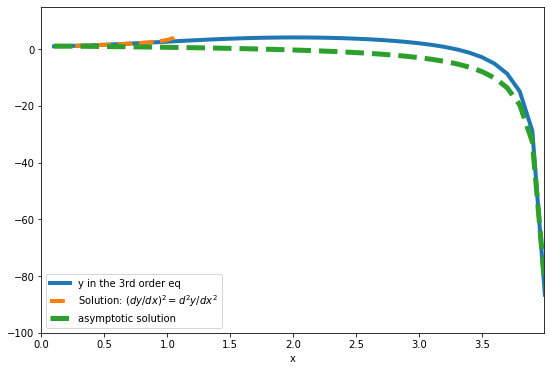

In [ ]:
plt.figure(figsize=(9,6))

plt.plot(sol.t,sol.y[0,:],linewidth=4,label='y in the 3rd order eq')
plt.plot(sol_small_x.t,sol_small_x.y[0,:],'--',linewidth=4,label='Solution: $(dy/dx)^2=d^2y/dx^2 $')
plt.plot(x,-6*(4.07-x)**(-1)+2.62,'--',linewidth=5,label='asymptotic solution')
plt.xlabel('x')
plt.xlim(0,3.99)
plt.ylim(-100,15)
plt.legend(loc='best');

## Problem 2

### Answer to Question 1

Let's take our integral, first of all:

$$I(\epsilon)=\int_0^{10} \frac{1}{(\epsilon+6x^4+13x^{8})^3}  dx$$

First of all, let's plot the integrand:

In [ ]:
eps_list=[0.02,0.04,0.06,0.08,0.1]
x=np.linspace(0,5,1001)
Integrand = [1/(eps+6*x**4+13*x**8)**3 for eps in eps_list]

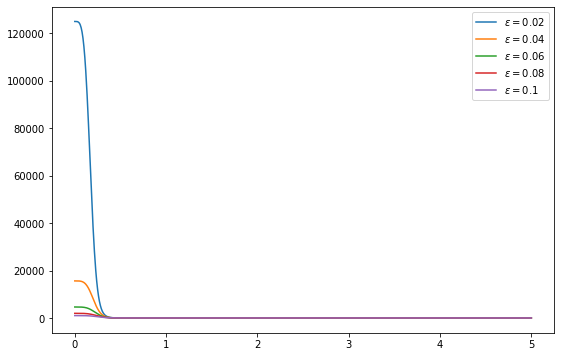

In [ ]:
plt.figure(figsize=(9,6))
[plt.plot(x,Integrand[i],label='$\epsilon=$'+str(eps_list[i])) for i in range(len(eps_list))]
plt.legend(loc='best')

We can easily observe the maximum is at $x=0$

First of all, let's find the heigth.

The integrand is maximum at $x=0$; thus:
$$\frac{1}{\left(\epsilon +6\cdot0^4+13\cdot0^8\right)^3}=\frac{1}{\epsilon^3}$$

Now, let's define that the width is the point when the integrand becomes $1/2$ of the max peak height. 

Thus we define the width when the integrand equals $\frac{1}{2\epsilon^3}$

$$\frac{1}{\left(\epsilon + 6\cdot width^4+13\cdot width^8\right)^3}=\frac{1}{2\epsilon^3},$$
which gives:
$$\left(\epsilon + 6\cdot x^4+13\cdot x^8\right)^3 = 2\epsilon^3$$

therefore:
$$6\cdot x^4+13\cdot x^8 = (2^\frac{1}{3}-1)\epsilon $$

Now we must do dominant balance on these three terms to find the regions where each term is dominant.

Dominant balance between $6x^4$ and $\epsilon$ term:
$$6x^4\approx (2^\frac{1}{3}-1)\epsilon$$
$$x = \left( \frac{(2^\frac{1}{3}-1)\epsilon}{6} \right)^\frac{1}{4}$$
We only keep positive knowing we are solving for width (a positive quantity).

Not let's check the neglected term:
 <br> $13x^8 \approx 13\left( \frac{\left(2^\frac{1}{3}-1\right)\epsilon}{6} \right)^2$. This is neglible only when $\epsilon <1$.

On the other hand, it is also possible that the $13x^8$ term determines the width. If we assume that:
$$x = \left( \frac{(2^\frac{1}{3}-1)\epsilon}{13} \right)^\frac{1}{8}.$$
Then $6x^4 \approx 6\left( \frac{(2^\frac{1}{3}-1)\epsilon}{13} \right)^\frac{1}{2}$. This is neglible only when $\epsilon > 1$.

One more case can be taken into consideration. Suppose the width based on the dominant balance is larger than $10$ (the original domain of integration). If that is the case, the width for purpose of integration must be limited to $10$.

<br> To find this transition, we can solve that if
$\left( \frac{(2^\frac{1}{3}-1)\epsilon}{13} \right)^\frac{1}{8}>10$ then $width = 10$.

In conclusion, the final approximation are:

1) If $\epsilon <1$ : 
$$I(\epsilon) =\frac{1}{\epsilon^3}\cdot \left( \frac{(2^\frac{1}{3}-1)\epsilon}{6} \right)^\frac{1}{4} = \left( \frac{(2^\frac{1}{3}-1)}{6} \right)^\frac{1}{4}\epsilon^{-\frac{11}{4}}$$ 

2) If $1<\epsilon \le 10^8\cdot \left( \frac{(2^\frac{1}{3}-1)}{13} \right)^{-1}$ : 
$$I(\epsilon) =\frac{1}{\epsilon^3}\cdot \left( \frac{(2^\frac{1}{3}-1)\epsilon}{13} \right)^\frac{1}{8} = \left( \frac{(2^\frac{1}{3}-1)}{13} \right)^\frac{1}{8}\epsilon^{-\frac{23}{8}}$$ 

3) If $10^8\cdot \left( \frac{(2^\frac{1}{3}-1)}{13} \right)^{-1}<\epsilon$ : 
$$I(\epsilon) =\frac{1}{\epsilon^3}\cdot L = \frac{10}{\epsilon^3}$$

In [ ]:
eps_list=10.**np.linspace(-6,13,100)
I_eps=[integrate.quad(lambda x: 1/(eps+6*x**4+13*x**8)**3, 0, 100)[0] for eps in eps_list]

y_ana_1=[((2**(1/3)-1)/6)**(1/4)*eps**(-11/4) for eps in eps_list if eps<1]
y_ana_2=[((2**(1/3)-1)/13)**(1/8)*eps**(-23/8) for eps in eps_list if (eps>1 and eps<10**8*((2**(1/3)-1)/13)**(-1))]
y_ana_3=[10/eps**3 for eps in eps_list if eps>=10**8*((2**(1/3)-1)/13)**(-1)]

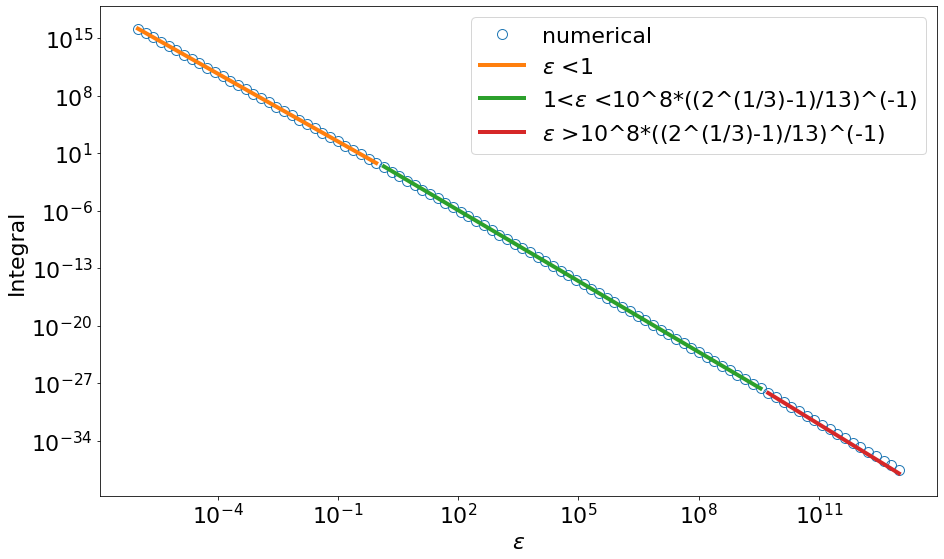

In [ ]:
plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(15,9))
plt.loglog(eps_list,I_eps,'o',mfc='none',markersize=10,label='numerical')
plt.loglog([eps for eps in eps_list if eps<1],y_ana_1,linewidth=4,label='$\epsilon$ <1')
plt.loglog([eps for eps in eps_list if (eps>1 and eps<10**8*((2**(1/3)-1)/13)**(-1))],y_ana_2,linewidth=4,label='1<$\epsilon$ <10^8*((2^(1/3)-1)/13)^(-1)')
plt.loglog([eps for eps in eps_list if eps>10**8*((2**(1/3)-1)/13)**(-1)],y_ana_3,linewidth=4,label='$\epsilon$ >10^8*((2^(1/3)-1)/13)^(-1)')

plt.xlabel('$\epsilon$')
plt.ylabel('Integral')
plt.legend(loc='best');

## Problem 3

### Answer to Question 1

Let's take our integral:
$$I(\epsilon)=\int_0^{20} \frac{x^2}{\epsilon+x^4+x^{10}}  dx$$

As a first step, let's plot the integrand:

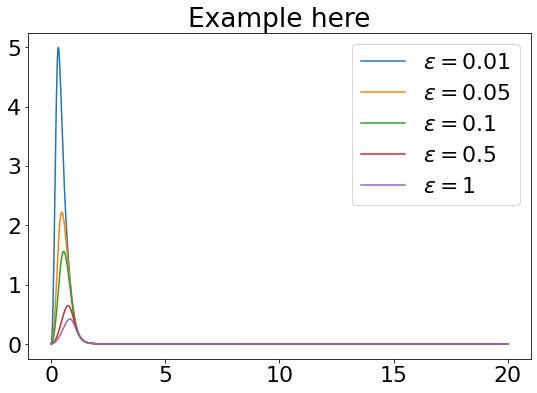

In [ ]:
eps_list=[0.01,0.05,0.1,0.5,1]
x=np.linspace(0,20,1001)
Integrand = [x**2/(eps+x**4+x**10) for eps in eps_list]

plt.figure(figsize=(9,6))
[plt.plot(x,Integrand[i],label='$\epsilon=$'+str(eps_list[i])) for i in range(len(eps_list))]
plt.legend(loc='best')
plt.title('Example here');

The next step is to find the height $f_{max}$ with the corresponding $x_{max}$ as well as the width $w$. In order to do so, we need to calculate the derivative of the integrand and let it be zero.

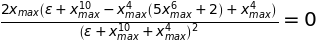

In [ ]:
x, eps = symbols('x_{max} \epsilon',real=True)
Eq(simplify(diff(x**2/(eps+x**4+x**10),x)),0)

The numerator should be zero. We can throw away $2x_{max}$ term since from the figure we see $x_{max}$ cannot be evaluated to zero. So we're going to evaluate
$$\epsilon-4x_{max}^{10}-x_{max}^4=0$$

On the above-written equation, let's apply the dominant balance:
- For small $\epsilon$, $x$ is also small. So we should throw away $-4x_{max}^{10}$ term. 
$$\Longrightarrow x_{max}=\epsilon^{1/4}$$
$$\Longrightarrow f_{max}=\frac{ x^2}{\epsilon+x^4+x^{10}}\bigg|_{x=\epsilon^{1/4}}=\frac{\epsilon^{1/2}}{2\epsilon+\epsilon^{5/2}}$$
- For large $\epsilon$, $x$ is also large, so we should throw away $-x_{max}^4$.
$$\Longrightarrow x_{max}=\left(\frac{\epsilon}{4}\right)^{1/10}$$
$$\Longrightarrow f_{max}=\frac{ x^2}{\epsilon+x^4+x^{10}}\bigg|_{x=\left(\frac{\epsilon}{4}\right)^{1/10}}=\frac{\left(\frac{\epsilon}{4}\right)^{1/5}}{\frac{5\epsilon}{4}+\left(\frac{\epsilon}{4}\right)^{2/5}}$$

In finding the width, we assume symmetry:

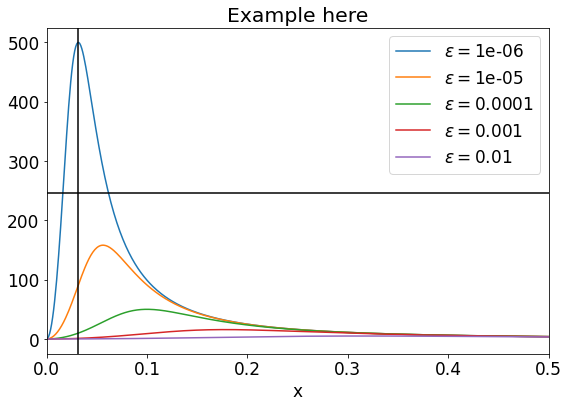

In [ ]:
eps_list=[0.000001,0.00001,0.0001,0.001,0.01]
x=np.linspace(0,1,1001)
Integrand = [x**2/(eps+x**4+x**10) for eps in eps_list]
plt.rcParams.update({'font.size': 17})
plt.figure(figsize=(9,6))
[plt.plot(x,Integrand[i],label='$\epsilon=$'+str(eps_list[i])) for i in range(len(eps_list))]
plt.legend(loc='best')
plt.xlim(0,0.5)
plt.axvline(x=(0.000000000001)**0.125,color='k')
plt.axhline(492.217/2,color='k')
plt.xlabel('x')
plt.title('Example here');

Based on the symmetry argument emerging from the plot, for determining the width, we'd like to find a point $x=w$ (such that $w<x_{max}$) that corresponds to $f(w)=f_{max}/2$. 
- For small $\epsilon$, we have
$$\frac{ w^2}{\epsilon+w^4+w^{10}}=\frac{\epsilon^{1/2}}{4\epsilon+2\epsilon^{5/2}}$$
and $$w<\epsilon^{1/4}$$
**Based on our observation, $w$ and $x_{max}$ are always on the same order.* Let $w=a\cdot \epsilon^{1/4}$ $(0<a<1)$ and plug it in. If we can successfully solve an $a$ in the $(0,1)$ range, the validity is automatically proven:
$$\frac{a^2\epsilon^{1/2}}{\epsilon+a^4\epsilon+a^{10}\epsilon^{5/2}}=\frac{\epsilon^{1/2}}{4\epsilon+2\epsilon^{5/2}}$$
which simplifies to
$$\frac{a^2}{1+a^4+a^{10}\epsilon^{3/2}}=\frac{1}{4+2\epsilon^{3/2}}$$

$$4a^2+2\epsilon^{3/2}a^2=1+a^4+a^{10}\epsilon^{3/2}$$
Because $\epsilon$ is very small and $a<1$, we can quickly identify the dominant balance corresponding to throwing away the $2^{nd}$ term on the LHS and the $2^{nd}$ and $3^{rd}$ terms on the RHS, leaving
$$4a^2=1,\quad a=\frac{1}{2}$$

Therefore, the width is $2(1-a)\epsilon^{1/4} = \epsilon^{1/4}$

$$I=f_{max}\cdot width=\frac{\epsilon^{1/2}}{2\epsilon+\epsilon^{5/2}}\cdot\epsilon^{1/4}$$

- For big $\epsilon$, we have
$$\frac{ w^2}{\epsilon+w^4+w^{10}}=\frac{\left(\frac{\epsilon}{4}\right)^{1/5}}{\frac{5\epsilon}{2}+2\left(\frac{\epsilon}{4}\right)^{2/5}}$$
and $$w<\left(\frac{\epsilon}{4}\right)^\frac{1}{10}$$
**Again, $w$ and $x_{max}$ are on the same order.* Let $w=a\cdot \left(\frac{\epsilon}{4}\right)^\frac{1}{10}$ $(0<a<1)$ and plug it in. As before, if we can successfully solve an $a$ in the $(0,1)$ range, the validity is automatically proven:
$$\frac{a^2\left(\frac{\epsilon}{4}\right)^{1/5}}{\epsilon+a^4\left(\frac{\epsilon}{4}\right)^{2/5}+a^{10}\left(\frac{\epsilon}{4}\right)}=\frac{\left(\frac{\epsilon}{4}\right)^{1/5}}{\frac{5\epsilon}{2}+2\left(\frac{\epsilon}{4}\right)^{2/5}}$$
which simplifies to
$$\frac{a^2}{1+\left(\frac{1}{4}\right)^{2/5}a^4\epsilon^{-3/5}+\frac{1}{4}a^{10}}=\frac{1}{\frac{5}{2}+2^{1/5}\epsilon^{-3/5}}$$

$$\frac{5}{2}a^2+2^{1/5}\epsilon^{-3/5}a^2=1+\left(\frac{1}{4}\right)^{2/5}a^4\epsilon^{-3/5}+\frac{1}{4}a^{10}$$
Because $\epsilon$ is very big and $a<1$, we can quickly identify the dominant balance corresponding to throwing away the $2^{nd}$ term on the LHS and the $2^{nd}$ and $3^{rd}$ terms on the RHS, leaving
$$\frac{5}{2}a^2=1,\quad a=\sqrt{\frac{2}{5}}$$

Therefore, the width is $2(1-a)\left(\frac{\epsilon}{4}\right)^{1/10} = 2\left(1-\sqrt{\frac{2}{5}}\right)\left(\frac{\epsilon}{4}\right)^{1/10}$

$$I=f_{max}\cdot width=\frac{\left(\frac{\epsilon}{4}\right)^{1/5}}{\frac{5\epsilon}{4}+\left(\frac{\epsilon}{4}\right)^{2/5}}\cdot 2\left(1-\sqrt{\frac{2}{5}}\right)\left(\frac{\epsilon}{4}\right)^{1/10}$$

In [ ]:
eps_list=10.**np.linspace(-6,13,100)
I_eps=[integrate.quad(lambda x: x**2/(eps+x**4+x**10), 0, 20)[0] for eps in eps_list]

y_ana_1=[(eps**(0.5)/(2*eps+eps**(5/2)))*eps**(0.25) for eps in eps_list if eps <1]
y_ana_2=[((eps*0.25)**0.2/((5/4)*eps+(0.25*eps)**(2/5)))*2*(1-(2/5)**0.5)*(0.25*eps)**0.1 for eps in eps_list if eps >1]

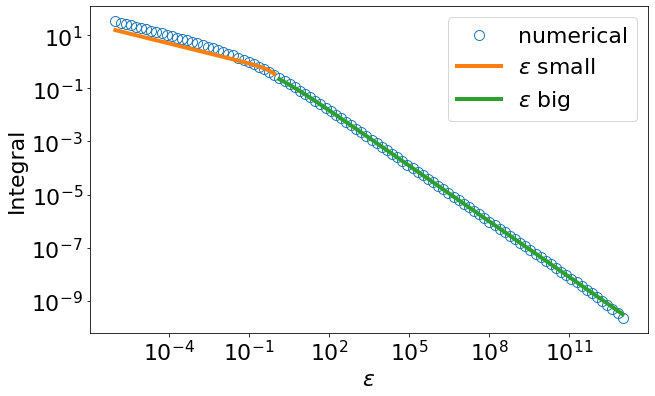

In [ ]:
plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(10,6))
plt.loglog(eps_list,I_eps,'o',mfc='none',markersize=10,label='numerical')
plt.loglog([eps for eps in eps_list if eps <1],y_ana_1,linewidth=4,label='$\epsilon$ small')
plt.loglog([eps for eps in eps_list if eps >1],y_ana_2,linewidth=4,label='$\epsilon$ big')
plt.xlabel('$\epsilon$')
plt.ylabel('Integral')
plt.legend(loc='best');

Both approximations, specifically the one for $\epsilon>1$, are extremely good.